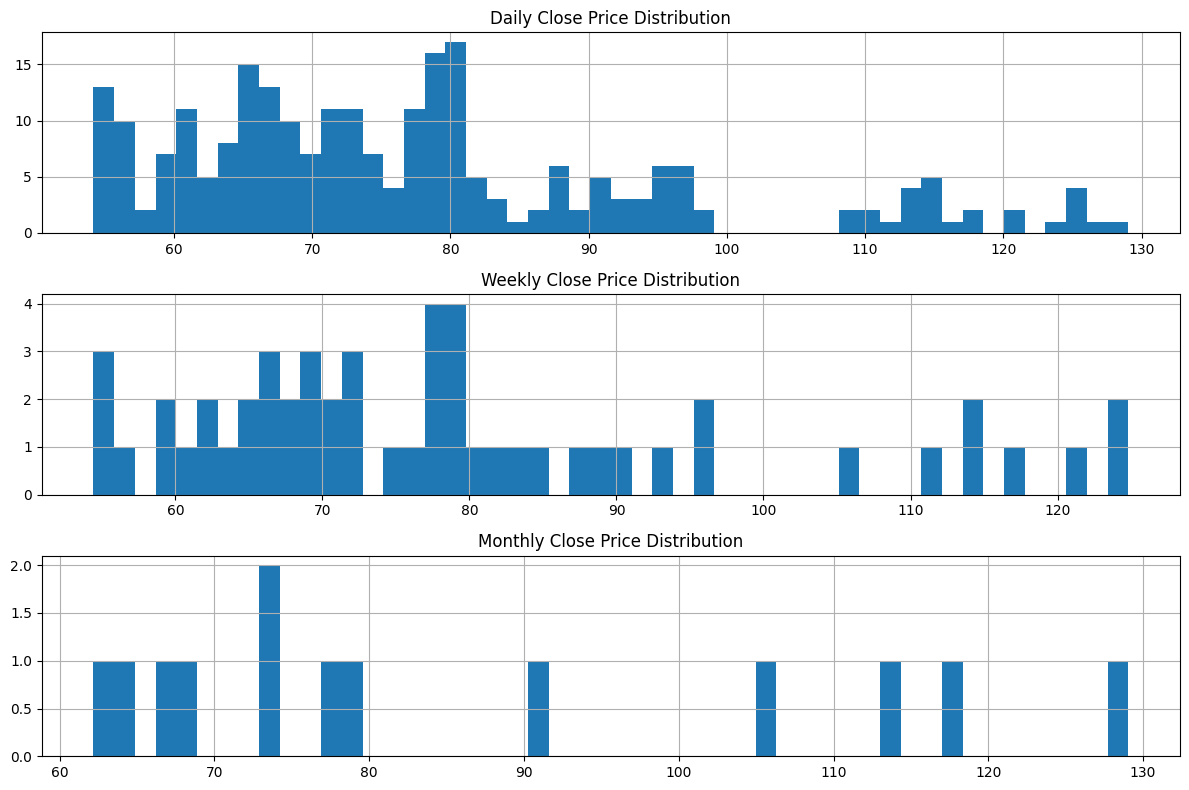

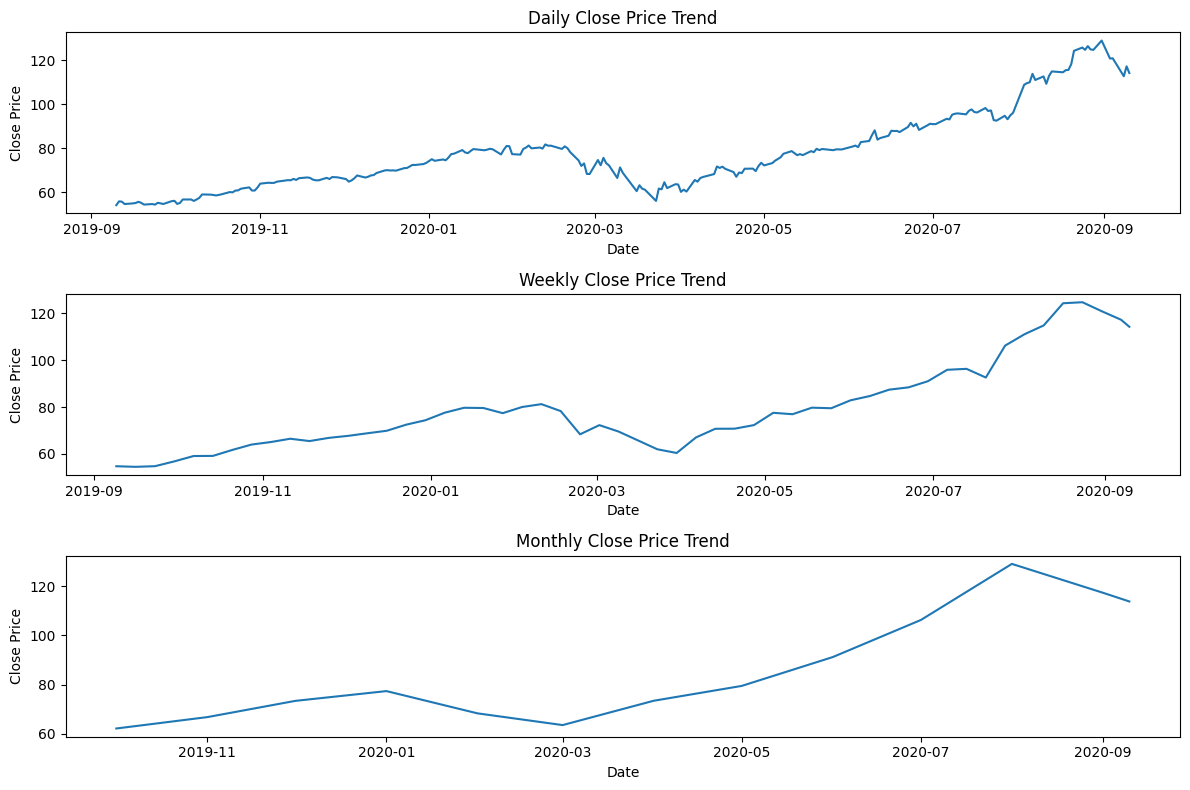

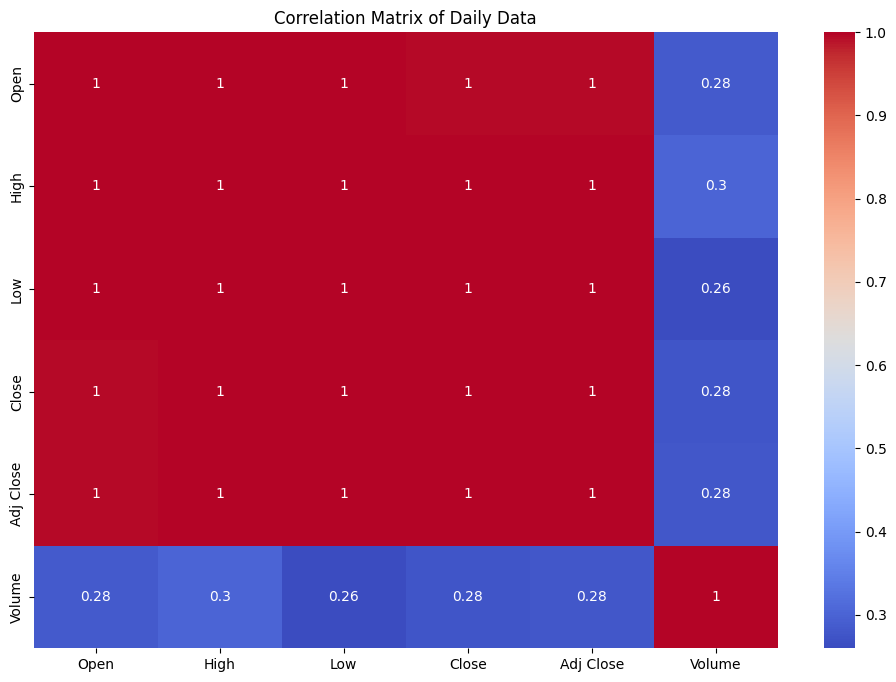

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the datasets
daily_data = pd.read_csv('/AAPL_daily_update.csv')
weekly_data = pd.read_csv('/AAPL_weekly_update.csv')
monthly_data = pd.read_csv('/AAPL_Montly_updates.csv')

# Convert 'Date' columns to datetime
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Set 'Date' as the index
daily_data.set_index('Date', inplace=True)
weekly_data.set_index('Date', inplace=True)
monthly_data.set_index('Date', inplace=True)

# Detect and handle outliers using Z-score method
def remove_outliers(df):
    z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    return df[filtered_entries]

daily_data_cleaned = remove_outliers(daily_data)
weekly_data_cleaned = remove_outliers(weekly_data)
monthly_data_cleaned = remove_outliers(monthly_data)

# Plot histograms for 'Close' prices
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
daily_data_cleaned['Close'].hist(bins=50)
plt.title('Daily Close Price Distribution')

plt.subplot(3, 1, 2)
weekly_data_cleaned['Close'].hist(bins=50)
plt.title('Weekly Close Price Distribution')

plt.subplot(3, 1, 3)
monthly_data_cleaned['Close'].hist(bins=50)
plt.title('Monthly Close Price Distribution')

plt.tight_layout()
plt.show()

# Plot 'Close' prices over time
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_data_cleaned.index, daily_data_cleaned['Close'])
plt.title('Daily Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(3, 1, 2)
plt.plot(weekly_data_cleaned.index, weekly_data_cleaned['Close'])
plt.title('Weekly Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(3, 1, 3)
plt.plot(monthly_data_cleaned.index, monthly_data_cleaned['Close'])
plt.title('Monthly Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))

correlation_matrix = daily_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Data')
plt.show()


Merged Data: 254 -> 0


<ipython-input-3-50507a7ec807>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned.fillna(merged_data_cleaned.mean(), inplace=True)


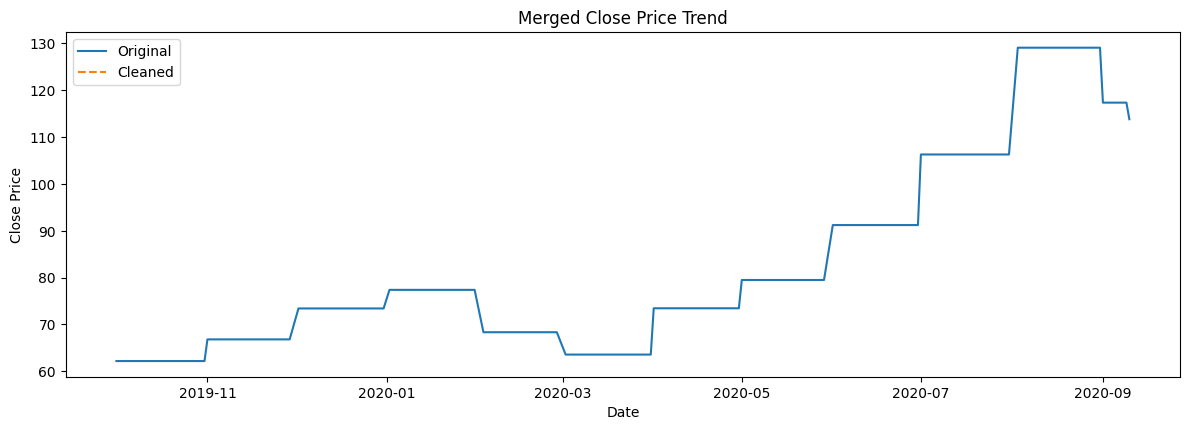

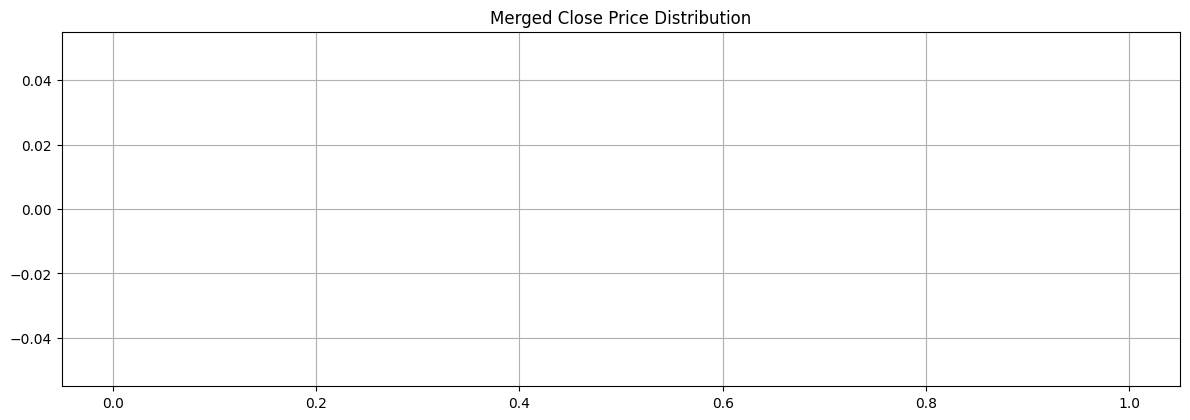

Merged Data Summary:
count    239.000000
mean      82.150940
std       20.300456
min       62.189999
25%       66.812500
50%       73.449997
75%       91.199997
max      129.039993
Name: Close, dtype: float64
Merged Data Cleaned Summary:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


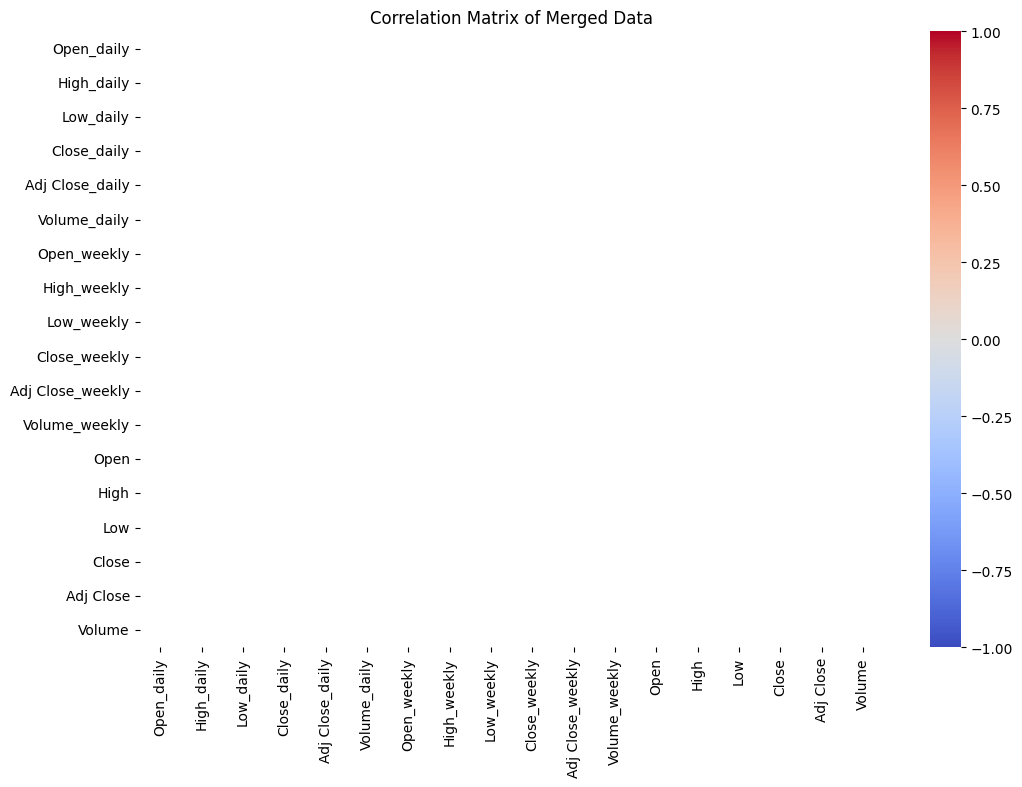

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the datasets
daily_data = pd.read_csv('/AAPL_daily_update.csv')
weekly_data = pd.read_csv('/AAPL_weekly_update.csv')
monthly_data = pd.read_csv('/AAPL_Montly_updates.csv')

# Convert 'Date' columns to datetime
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Set 'Date' as the index
daily_data.set_index('Date', inplace=True)
weekly_data.set_index('Date', inplace=True)
monthly_data.set_index('Date', inplace=True)

# Resample weekly and monthly data to daily frequency
weekly_data_resampled = weekly_data.resample('D').ffill()
monthly_data_resampled = monthly_data.resample('D').ffill()

# Merge datasets on the 'Date' index
merged_data = daily_data.join(weekly_data_resampled, lsuffix='_daily', rsuffix='_weekly', how='left')
merged_data = merged_data.join(monthly_data_resampled, lsuffix='', rsuffix='_monthly', how='left')

# Handle missing values
# For this example, we'll forward fill missing values
merged_data.fillna(method='ffill', inplace=True)

# Detect and handle outliers using Z-score method
def remove_outliers(df):
    z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    return df[filtered_entries]

merged_data_cleaned = remove_outliers(merged_data)

# Check the number of rows before and after outlier removal
print(f'Merged Data: {merged_data.shape[0]} -> {merged_data_cleaned.shape[0]}')

# Further handle any remaining NaN values by filling them with the mean of each column
merged_data_cleaned.fillna(merged_data_cleaned.mean(), inplace=True)

# Plot 'Close' prices before and after outlier removal
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(merged_data.index, merged_data['Close'], label='Original')
plt.plot(merged_data_cleaned.index, merged_data_cleaned['Close'], label='Cleaned', linestyle='--')
plt.title('Merged Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()

# Plot histograms for 'Close' prices
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
merged_data_cleaned['Close'].hist(bins=50)
plt.title('Merged Close Price Distribution')

plt.tight_layout()
plt.show()

# Summary statistics before and after outlier removal
print("Merged Data Summary:")
print(merged_data['Close'].describe())
print("Merged Data Cleaned Summary:")
print(merged_data_cleaned['Close'].describe())

# Plot correlation heatmap for merged data
plt.figure(figsize=(12, 8))

# Ensuring that the correlation matrix is correctly calculated
correlation_matrix = merged_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Merged Data')
plt.show()


<ipython-input-5-ff43135cc18f>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned.fillna(merged_data_cleaned.mean(), inplace=True)


Merged Data: 254 -> 0
Any NaN values in merged_data_cleaned: False
Empty DataFrame
Columns: [Open_daily, High_daily, Low_daily, Close_daily, Adj Close_daily, Volume_daily, Open_weekly, High_weekly, Low_weekly, Close_weekly, Adj Close_weekly, Volume_weekly, Open, High, Low, Close, Adj Close, Volume]
Index: []
Merged Data Summary:
count    239.000000
mean      82.150940
std       20.300456
min       62.189999
25%       66.812500
50%       73.449997
75%       91.199997
max      129.039993
Name: Close, dtype: float64
Merged Data Cleaned Summary:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


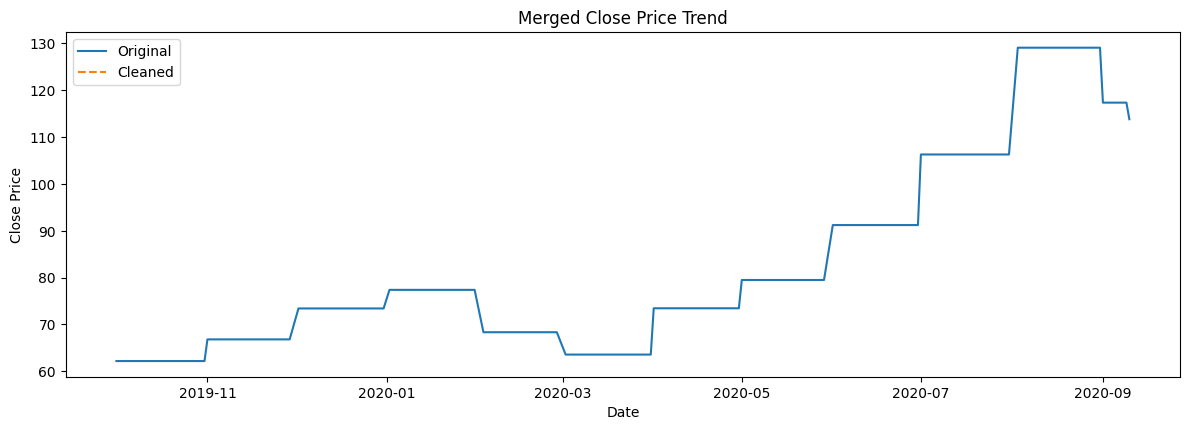

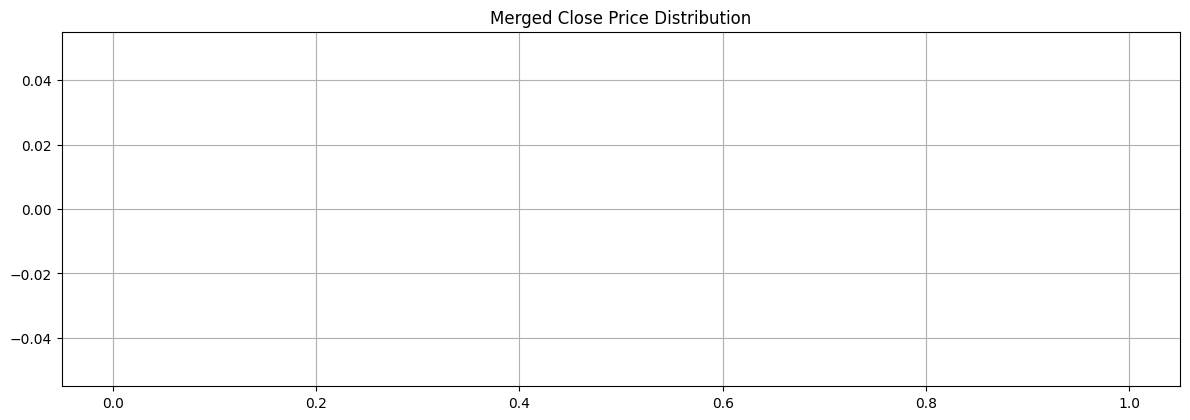

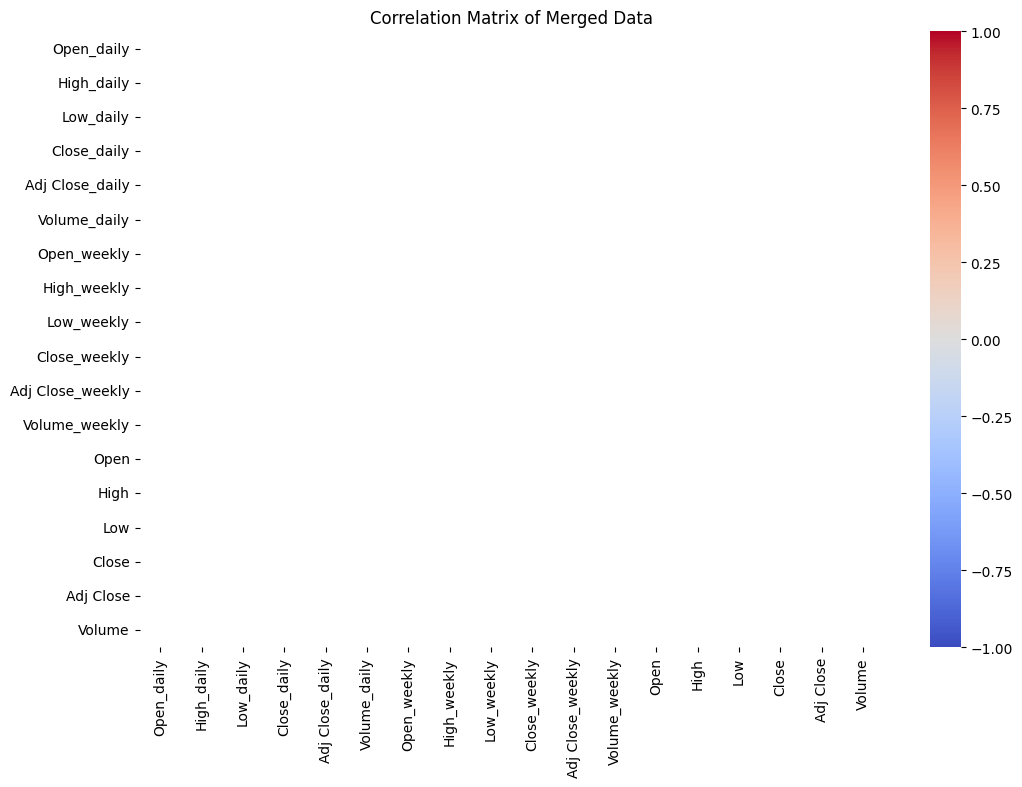

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the datasets
daily_data = pd.read_csv('/AAPL_daily_update.csv')
weekly_data = pd.read_csv('/AAPL_weekly_update.csv')
monthly_data = pd.read_csv('/AAPL_Montly_updates.csv')

# Convert 'Date' columns to datetime
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Set 'Date' as the index
daily_data.set_index('Date', inplace=True)
weekly_data.set_index('Date', inplace=True)
monthly_data.set_index('Date', inplace=True)

# Resample weekly and monthly data to daily frequency
weekly_data_resampled = weekly_data.resample('D').ffill()
monthly_data_resampled = monthly_data.resample('D').ffill()

# Merge datasets on the 'Date' index
merged_data = daily_data.join(weekly_data_resampled, lsuffix='_daily', rsuffix='_weekly', how='left')
merged_data = merged_data.join(monthly_data_resampled, lsuffix='', rsuffix='_monthly', how='left')

# Handle missing values
merged_data.fillna(method='ffill', inplace=True)

# Detect and handle outliers using Z-score method
def remove_outliers(df):
    z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    return df[filtered_entries]

merged_data_cleaned = remove_outliers(merged_data)

# Further handle any remaining NaN values by filling them with the mean of each column
merged_data_cleaned.fillna(merged_data_cleaned.mean(), inplace=True)

# Check the number of rows before and after outlier removal
print(f'Merged Data: {merged_data.shape[0]} -> {merged_data_cleaned.shape[0]}')

# Check for any remaining NaN values
print(f'Any NaN values in merged_data_cleaned: {merged_data_cleaned.isna().any().any()}')

# Display a snippet of the cleaned data
print(merged_data_cleaned.head())

# Summary statistics before and after outlier removal
print("Merged Data Summary:")
print(merged_data['Close'].describe())
print("Merged Data Cleaned Summary:")
print(merged_data_cleaned['Close'].describe())

# Plot 'Close' prices before and after outlier removal
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(merged_data.index, merged_data['Close'], label='Original')
plt.plot(merged_data_cleaned.index, merged_data_cleaned['Close'], label='Cleaned', linestyle='--')
plt.title('Merged Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()

# Plot histograms for 'Close' prices
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
merged_data_cleaned['Close'].hist(bins=50)
plt.title('Merged Close Price Distribution')

plt.tight_layout()
plt.show()

# Plot correlation heatmap for merged data
plt.figure(figsize=(12, 8))

# Ensuring that the correlation matrix is correctly calculated
correlation_matrix = merged_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Merged Data')
plt.show()


<ipython-input-6-ea11190b2dbc>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned.fillna(merged_data_cleaned.mean(), inplace=True)


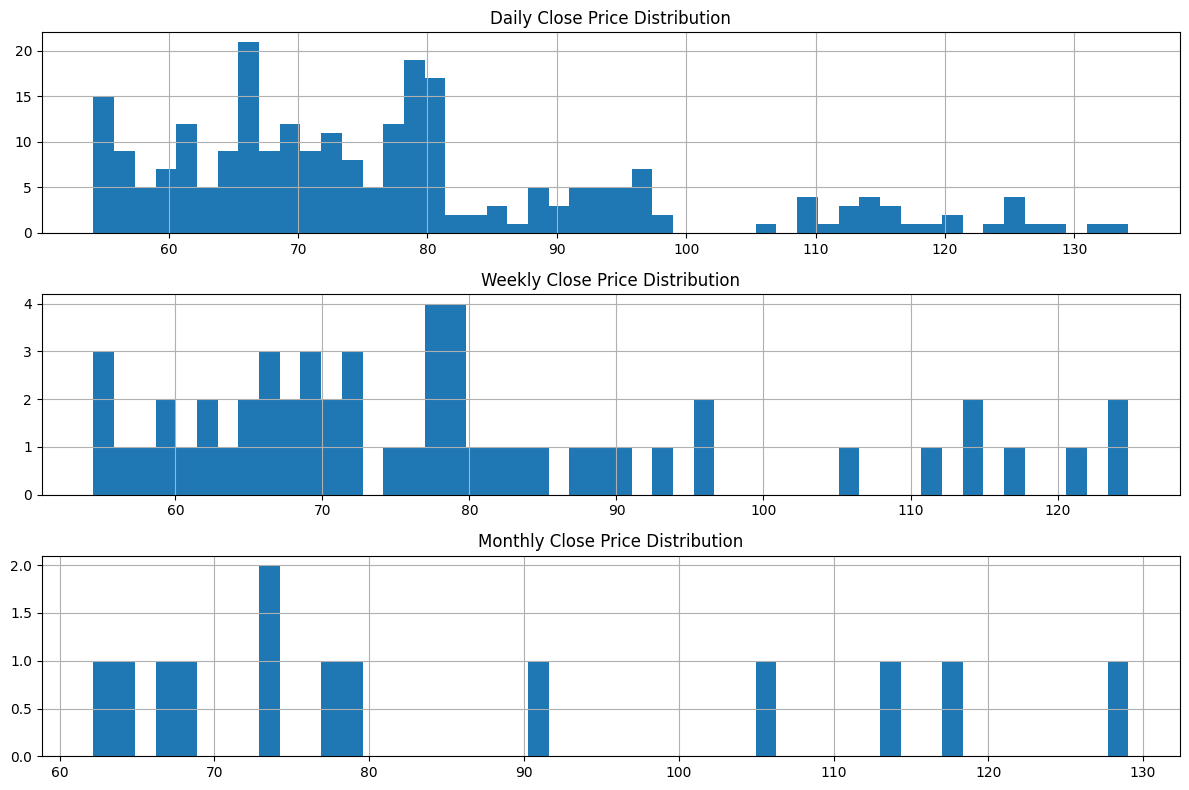

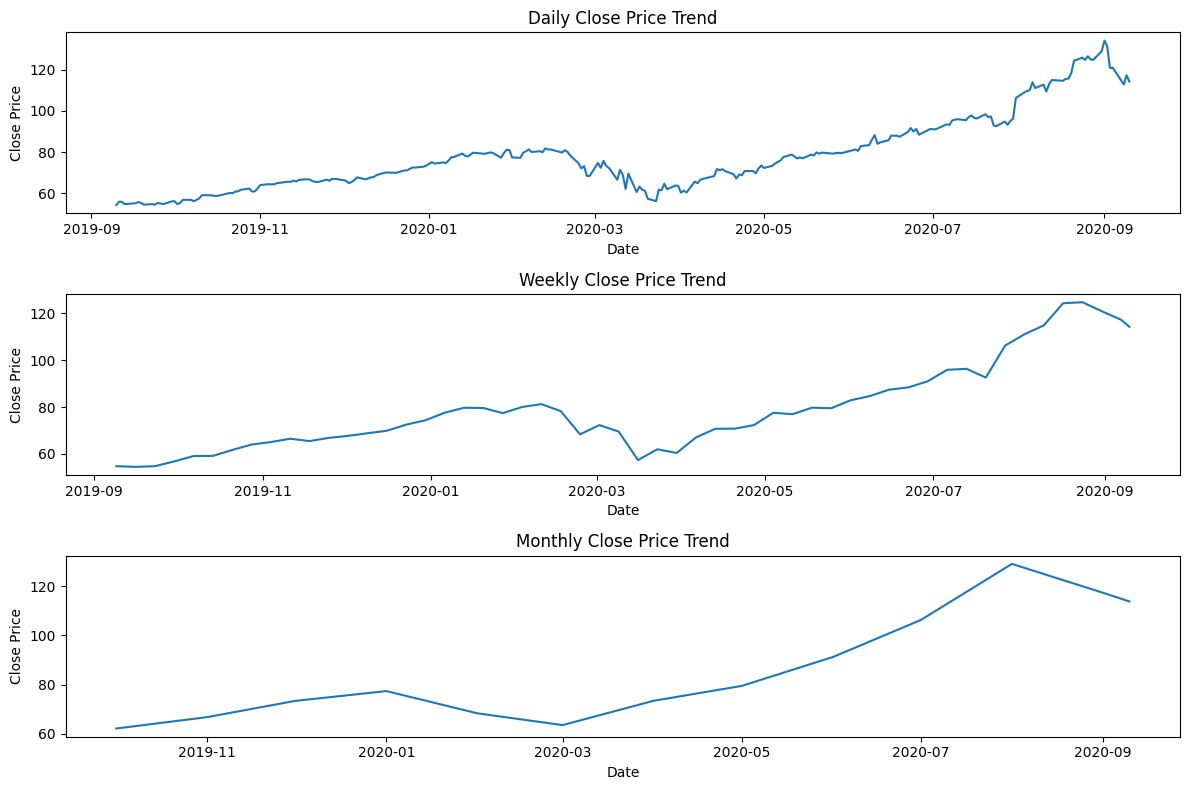

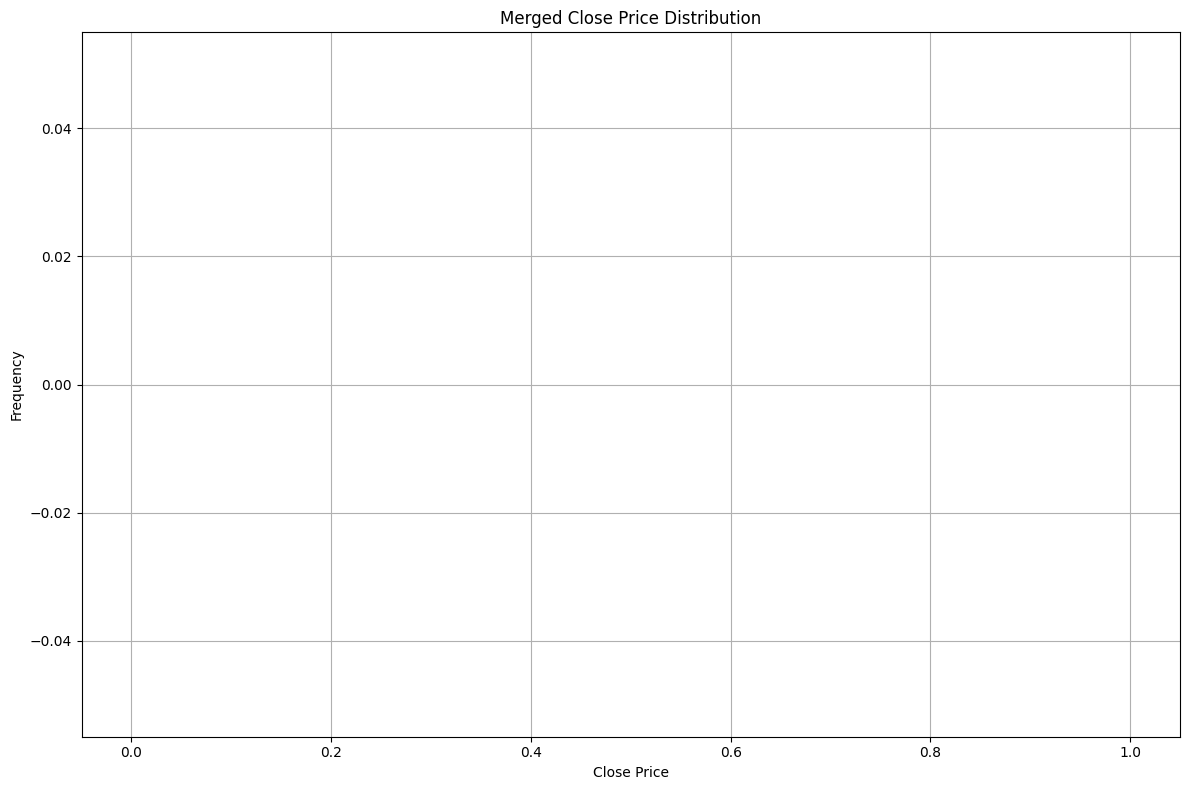

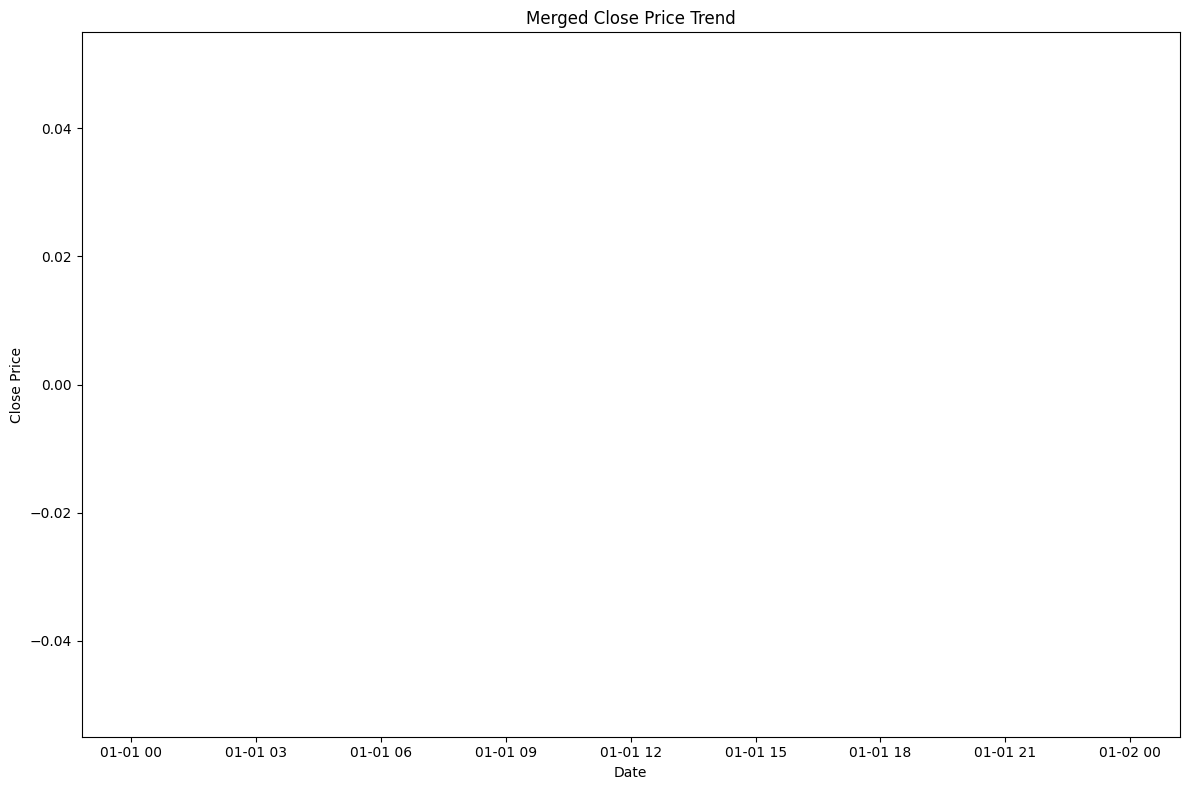

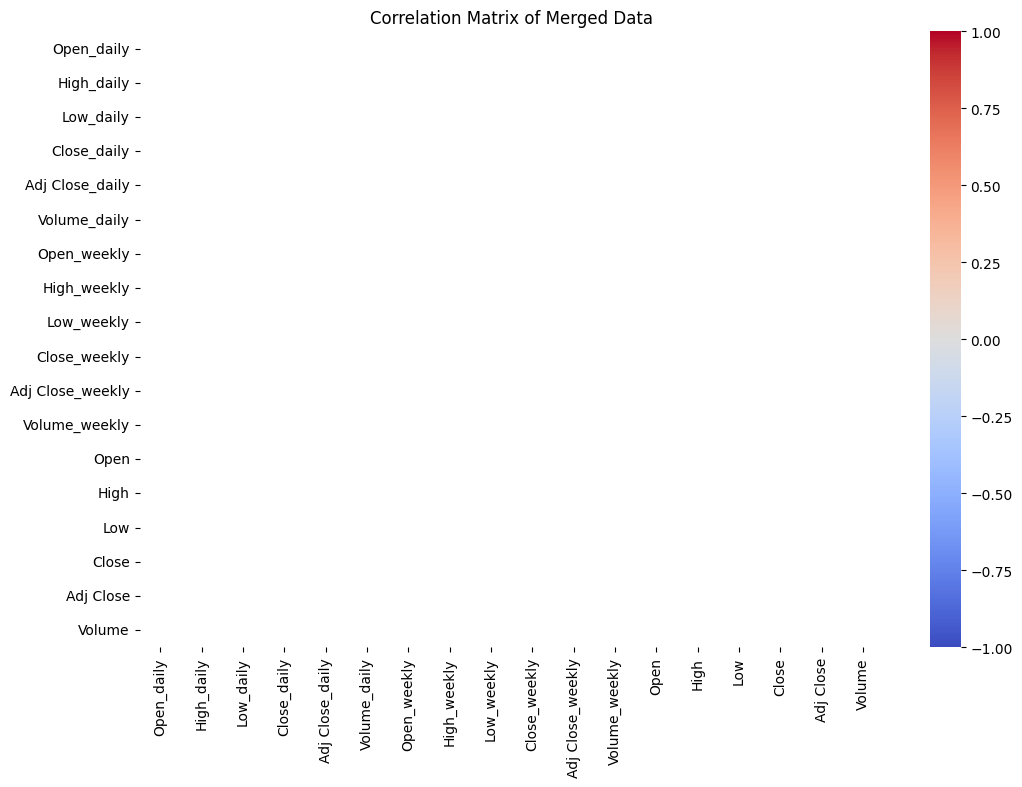

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the datasets
daily_data = pd.read_csv('/AAPL_daily_update.csv')
weekly_data = pd.read_csv('/AAPL_weekly_update.csv')
monthly_data = pd.read_csv('/AAPL_Montly_updates.csv')


# Convert 'Date' columns to datetime
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Set 'Date' as the index
daily_data.set_index('Date', inplace=True)
weekly_data.set_index('Date', inplace=True)
monthly_data.set_index('Date', inplace=True)

# Resample weekly and monthly data to daily frequency
weekly_data_resampled = weekly_data.resample('D').ffill()
monthly_data_resampled = monthly_data.resample('D').ffill()

# Merge datasets on the 'Date' index
merged_data = daily_data.join(weekly_data_resampled, lsuffix='_daily', rsuffix='_weekly', how='left')
merged_data = merged_data.join(monthly_data_resampled, lsuffix='', rsuffix='_monthly', how='left')

# Handle missing values by forward filling
merged_data.fillna(method='ffill', inplace=True)

# Detect and handle outliers using Z-score method
def remove_outliers(df):
    z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    return df[filtered_entries]

merged_data_cleaned = remove_outliers(merged_data)

# Further handle any remaining NaN values by filling them with the mean of each column
merged_data_cleaned.fillna(merged_data_cleaned.mean(), inplace=True)

# Plot histograms for 'Close' prices
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
daily_data['Close'].hist(bins=50)
plt.title('Daily Close Price Distribution')

plt.subplot(3, 1, 2)
weekly_data['Close'].hist(bins=50)
plt.title('Weekly Close Price Distribution')

plt.subplot(3, 1, 3)
monthly_data['Close'].hist(bins=50)
plt.title('Monthly Close Price Distribution')

plt.tight_layout()
plt.show()

# Plot 'Close' prices over time
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_data.index, daily_data['Close'])
plt.title('Daily Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(3, 1, 2)
plt.plot(weekly_data.index, weekly_data['Close'])
plt.title('Weekly Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, monthly_data['Close'])
plt.title('Monthly Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

# Plot histograms for merged 'Close' prices
plt.figure(figsize=(12, 8))

merged_data_cleaned['Close'].hist(bins=50)
plt.title('Merged Close Price Distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot 'Close' prices for merged data over time
plt.figure(figsize=(12, 8))

plt.plot(merged_data_cleaned.index, merged_data_cleaned['Close'])
plt.title('Merged Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

# Plot correlation heatmap for merged data
plt.figure(figsize=(12, 8))

correlation_matrix = merged_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Merged Data')
plt.show()


             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    77.811968   78.881654   76.853898   77.962006   77.629584   
std     18.397894   18.637236   17.870732   18.242082   18.386763   
min     53.465000   54.195000   52.927502   54.174999   53.642761   
25%     64.830624   65.803123   64.538122   65.456249   65.007768   
50%     73.969998   75.187500   72.616249   74.373749   73.951840   
75%     85.463125   86.817497   83.452499   85.485623   85.331766   
max    137.589996  137.979996  130.529999  134.179993  134.179993   

             Volume  
count  2.540000e+02  
mean   1.446323e+08  
std    6.735329e+07  
min    4.661760e+07  
25%    1.006259e+08  
50%    1.275770e+08  
75%    1.676812e+08  
max    4.184740e+08  
             Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean    77.415333   78.452853   76.533458 

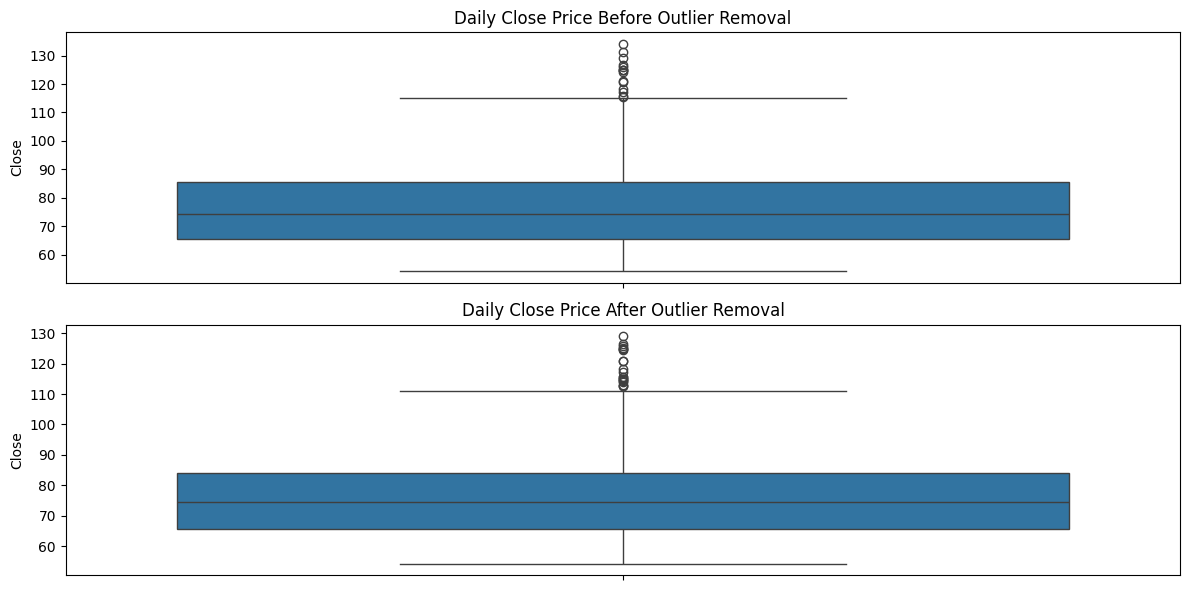

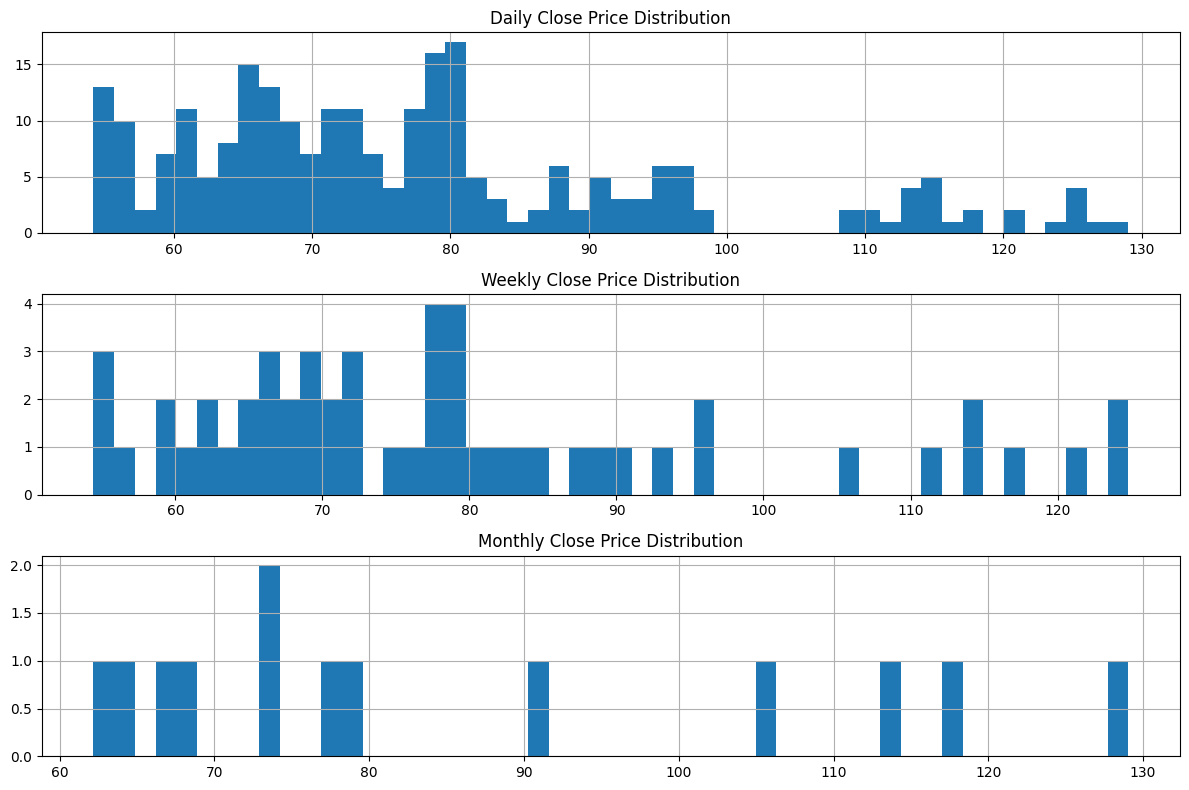

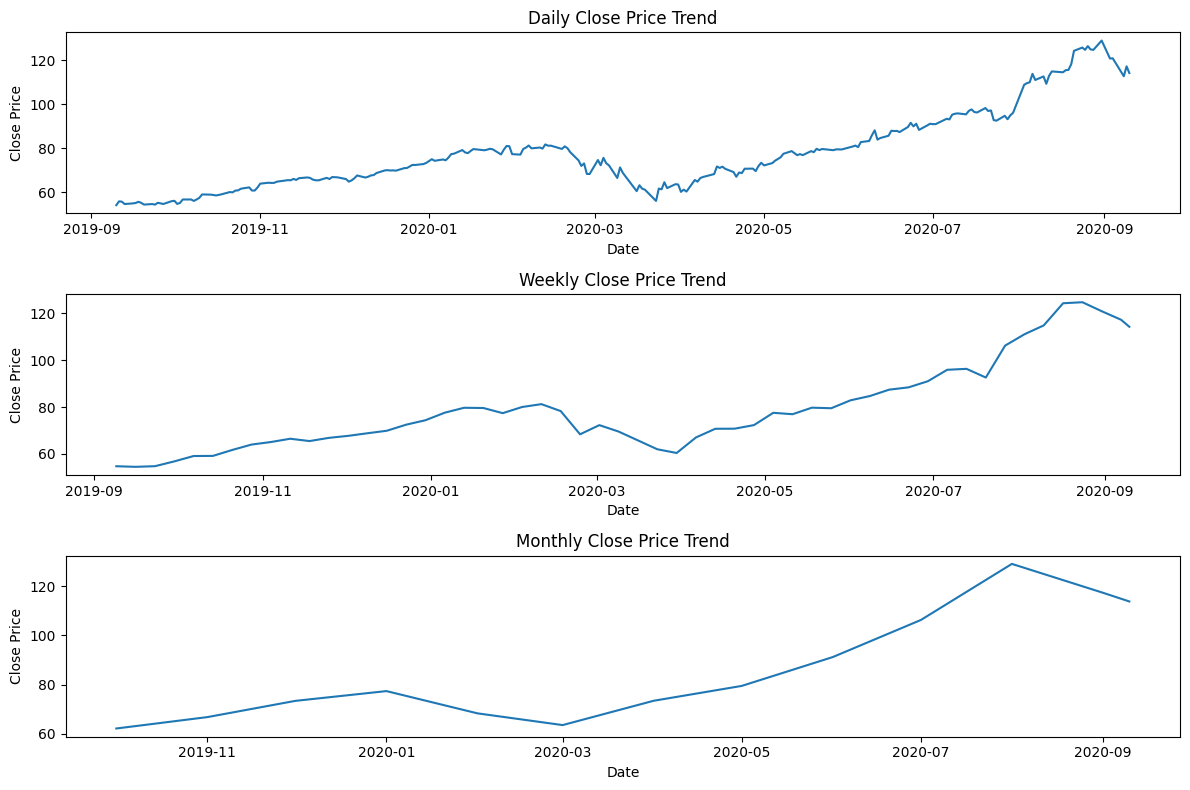

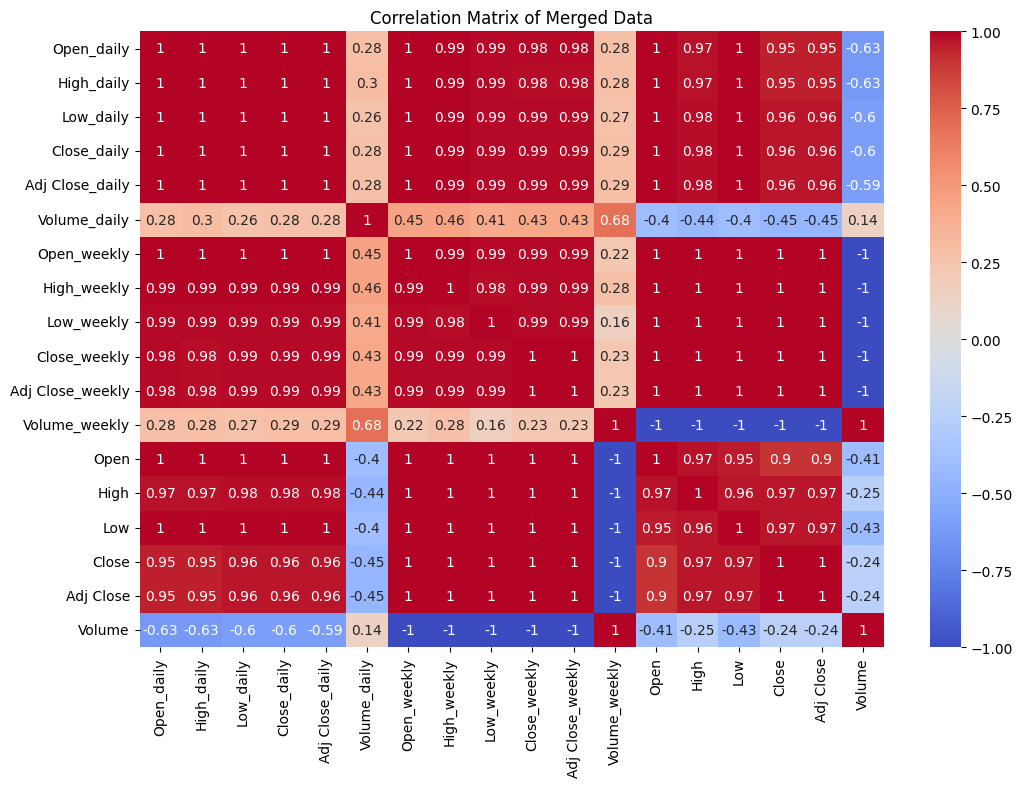

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the datasets
daily_data = pd.read_csv('/AAPL_daily_update.csv')
weekly_data = pd.read_csv('/AAPL_weekly_update.csv')
monthly_data = pd.read_csv('/AAPL_Montly_updates.csv')

# Convert 'Date' columns to datetime
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Set 'Date' as the index
daily_data.set_index('Date', inplace=True)
weekly_data.set_index('Date', inplace=True)
monthly_data.set_index('Date', inplace=True)

# Detect and handle outliers using Z-score method
def remove_outliers(df):
    z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    return df[filtered_entries]

daily_data_cleaned = remove_outliers(daily_data)
weekly_data_cleaned = remove_outliers(weekly_data)
monthly_data_cleaned = remove_outliers(monthly_data)

print(daily_data.describe())
print(daily_data_cleaned.describe())
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.boxplot(data=daily_data['Close'])
plt.title('Daily Close Price Before Outlier Removal')

plt.subplot(2, 1, 2)
sns.boxplot(data=daily_data_cleaned['Close'])
plt.title('Daily Close Price After Outlier Removal')

plt.tight_layout()
plt.show()


# Merge the datasets
merged_data = daily_data_cleaned.join(weekly_data_cleaned, lsuffix='_daily', rsuffix='_weekly', how='outer')
merged_data = merged_data.join(monthly_data_cleaned, lsuffix='_daily_weekly', rsuffix='_monthly', how='outer')

# Plot histograms for 'Close' prices
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
daily_data_cleaned['Close'].hist(bins=50)
plt.title('Daily Close Price Distribution')

plt.subplot(3, 1, 2)
weekly_data_cleaned['Close'].hist(bins=50)
plt.title('Weekly Close Price Distribution')

plt.subplot(3, 1, 3)
monthly_data_cleaned['Close'].hist(bins=50)
plt.title('Monthly Close Price Distribution')

plt.tight_layout()
plt.show()

# Plot 'Close' prices over time
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_data_cleaned.index, daily_data_cleaned['Close'])
plt.title('Daily Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(3, 1, 2)
plt.plot(weekly_data_cleaned.index, weekly_data_cleaned['Close'])
plt.title('Weekly Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(3, 1, 3)
plt.plot(monthly_data_cleaned.index, monthly_data_cleaned['Close'])
plt.title('Monthly Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

# Plot correlation heatmap for merged data
plt.figure(figsize=(12, 8))

correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Merged Data')
plt.show()


Daily Data Summary Before Outlier Removal:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    77.811968   78.881654   76.853898   77.962006   77.629584   
std     18.397894   18.637236   17.870732   18.242082   18.386763   
min     53.465000   54.195000   52.927502   54.174999   53.642761   
25%     64.830624   65.803123   64.538122   65.456249   65.007768   
50%     73.969998   75.187500   72.616249   74.373749   73.951840   
75%     85.463125   86.817497   83.452499   85.485623   85.331766   
max    137.589996  137.979996  130.529999  134.179993  134.179993   

             Volume  
count  2.540000e+02  
mean   1.446323e+08  
std    6.735329e+07  
min    4.661760e+07  
25%    1.006259e+08  
50%    1.275770e+08  
75%    1.676812e+08  
max    4.184740e+08  

Daily Data Summary After Outlier Removal:
             Open        High         Low       Close   Adj Close  \
count  248.000000  248.00

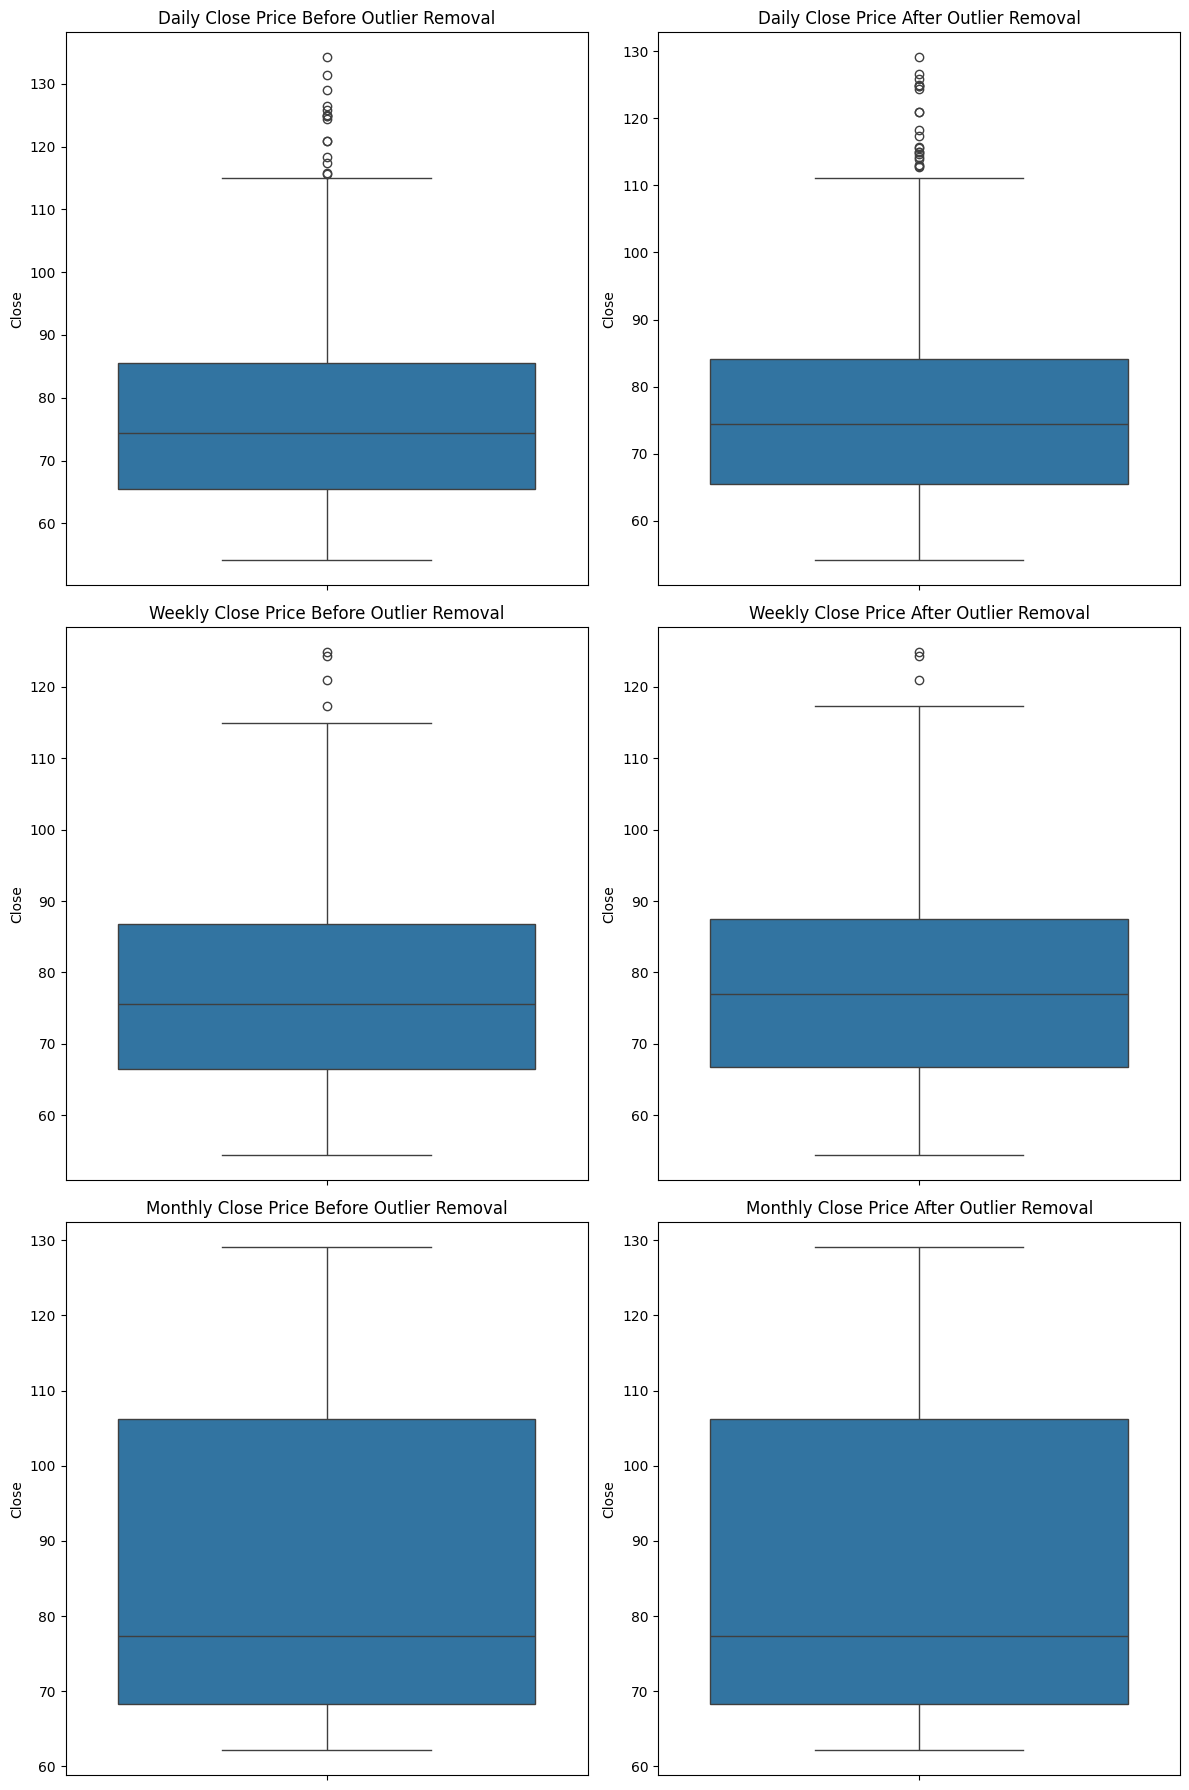

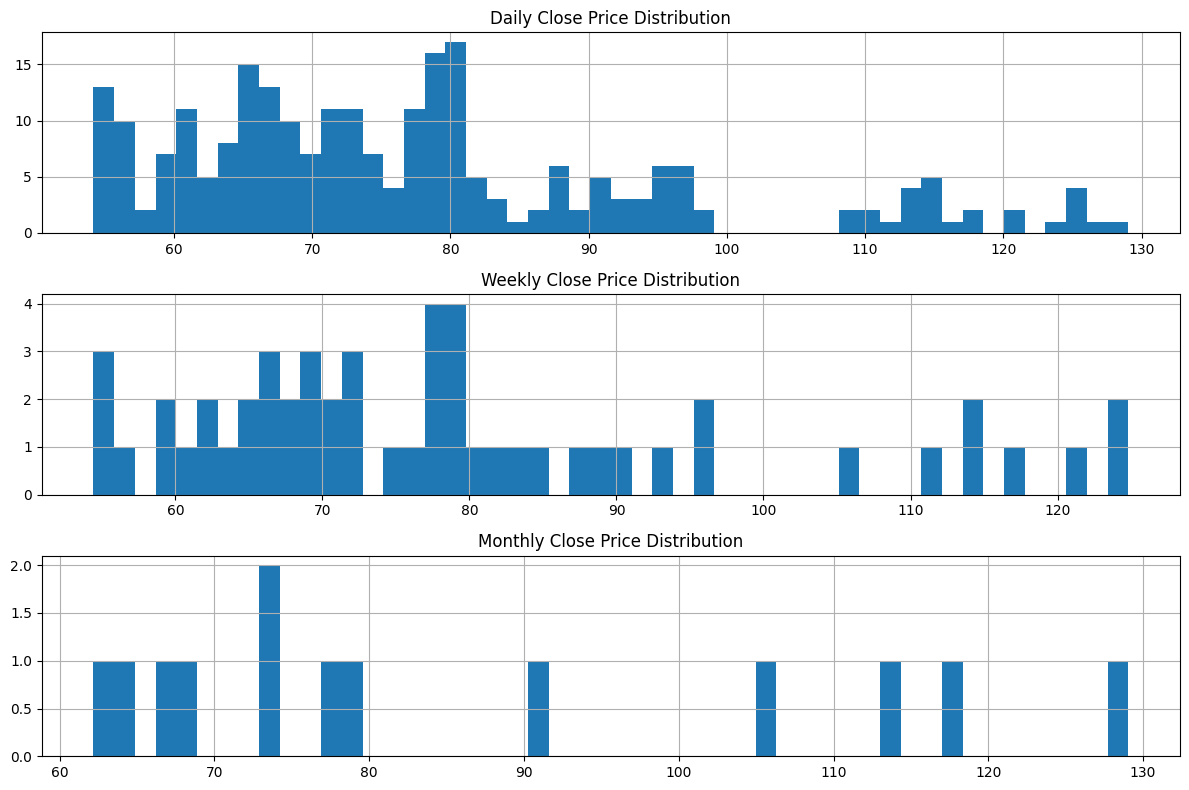

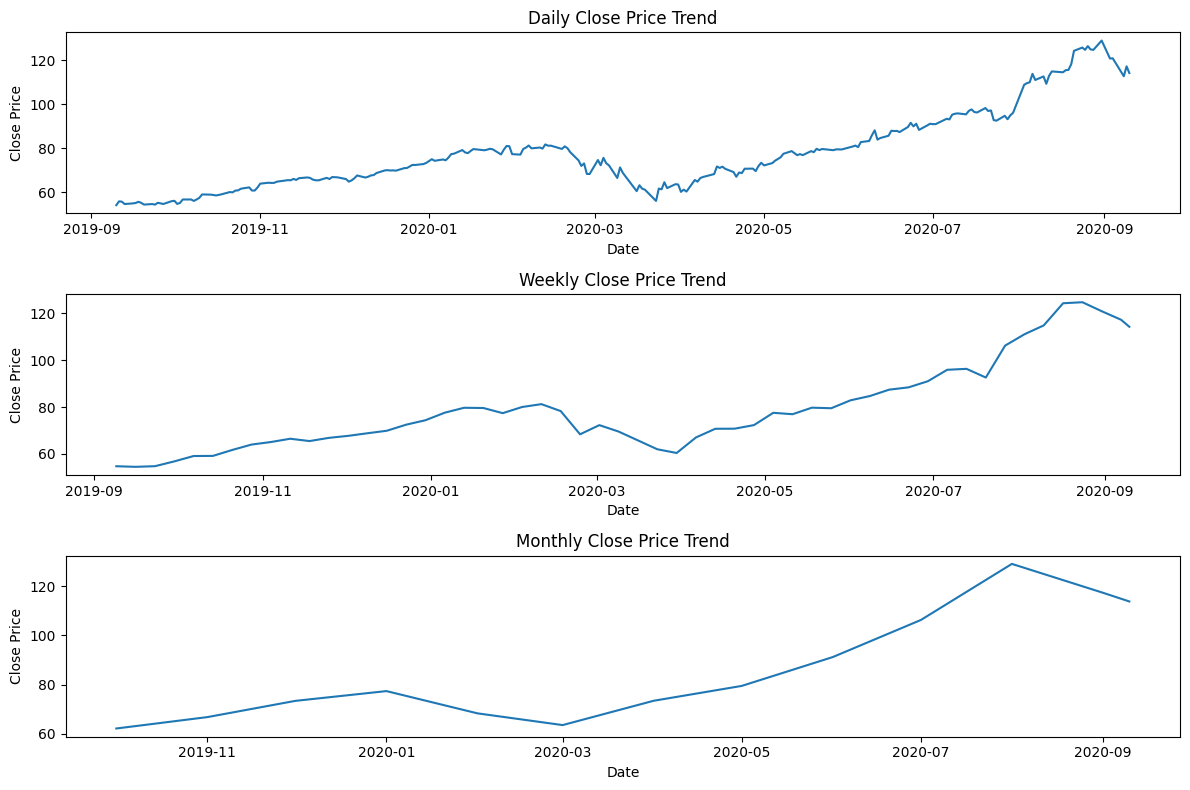

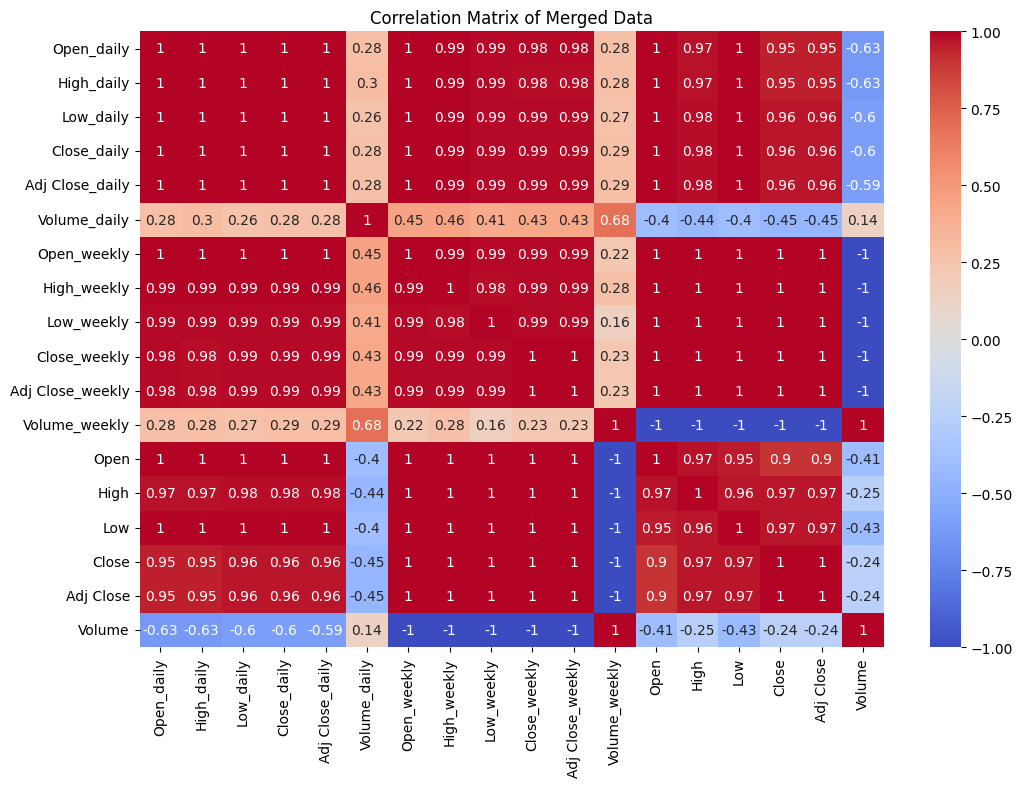

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the datasets
daily_data = pd.read_csv('/AAPL_daily_update.csv')
weekly_data = pd.read_csv('/AAPL_weekly_update.csv')
monthly_data = pd.read_csv('/AAPL_Montly_updates.csv')


# Convert 'Date' columns to datetime
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Set 'Date' as the index
daily_data.set_index('Date', inplace=True)
weekly_data.set_index('Date', inplace=True)
monthly_data.set_index('Date', inplace=True)

# Detect and handle outliers using Z-score method
def remove_outliers(df):
    z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    return df[filtered_entries]

daily_data_cleaned = remove_outliers(daily_data)
weekly_data_cleaned = remove_outliers(weekly_data)
monthly_data_cleaned = remove_outliers(monthly_data)

# Print statistical summaries
print("Daily Data Summary Before Outlier Removal:")
print(daily_data.describe())
print("\nDaily Data Summary After Outlier Removal:")
print(daily_data_cleaned.describe())

print("\nWeekly Data Summary Before Outlier Removal:")
print(weekly_data.describe())
print("\nWeekly Data Summary After Outlier Removal:")
print(weekly_data_cleaned.describe())

print("\nMonthly Data Summary Before Outlier Removal:")
print(monthly_data.describe())
print("\nMonthly Data Summary After Outlier Removal:")
print(monthly_data_cleaned.describe())

# Visualize boxplots before and after outlier removal
plt.figure(figsize=(12, 18))

plt.subplot(3, 2, 1)
sns.boxplot(data=daily_data['Close'])
plt.title('Daily Close Price Before Outlier Removal')

plt.subplot(3, 2, 2)
sns.boxplot(data=daily_data_cleaned['Close'])
plt.title('Daily Close Price After Outlier Removal')

plt.subplot(3, 2, 3)
sns.boxplot(data=weekly_data['Close'])
plt.title('Weekly Close Price Before Outlier Removal')

plt.subplot(3, 2, 4)
sns.boxplot(data=weekly_data_cleaned['Close'])
plt.title('Weekly Close Price After Outlier Removal')

plt.subplot(3, 2, 5)
sns.boxplot(data=monthly_data['Close'])
plt.title('Monthly Close Price Before Outlier Removal')

plt.subplot(3, 2, 6)
sns.boxplot(data=monthly_data_cleaned['Close'])
plt.title('Monthly Close Price After Outlier Removal')

plt.tight_layout()
plt.show()

# Merge the datasets
merged_data = daily_data_cleaned.join(weekly_data_cleaned, lsuffix='_daily', rsuffix='_weekly', how='outer')
merged_data = merged_data.join(monthly_data_cleaned, lsuffix='_daily_weekly', rsuffix='_monthly', how='outer')

# Plot histograms for 'Close' prices
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
daily_data_cleaned['Close'].hist(bins=50)
plt.title('Daily Close Price Distribution')

plt.subplot(3, 1, 2)
weekly_data_cleaned['Close'].hist(bins=50)
plt.title('Weekly Close Price Distribution')

plt.subplot(3, 1, 3)
monthly_data_cleaned['Close'].hist(bins=50)
plt.title('Monthly Close Price Distribution')

plt.tight_layout()
plt.show()

# Plot 'Close' prices over time
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_data_cleaned.index, daily_data_cleaned['Close'])
plt.title('Daily Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(3, 1, 2)
plt.plot(weekly_data_cleaned.index, weekly_data_cleaned['Close'])
plt.title('Weekly Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(3, 1, 3)
plt.plot(monthly_data_cleaned.index, monthly_data_cleaned['Close'])
plt.title('Monthly Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

# Plot correlation heatmap for merged data
plt.figure(figsize=(12, 8))

correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Merged Data')
plt.show()
